<a href="https://colab.research.google.com/github/shahabday/Image_search_using_embedding/blob/main/Create_embeddings_with_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [47]:
from pathlib import Path
import os

path = Path('/gdrive/MyDrive/art_recommendation')


In [48]:
os.listdir(path)

['picasso',
 'Rivera',
 'boticelli',
 'Dali',
 'pollock',
 'vangogh',
 'Yayoi_Kusama',
 'MF_Husain',
 'claude_monet',
 'banksy',
 'Modigliani',
 'vermeer',
 'Tom_Whalen',
 'Escher',
 'baldessari',
 'Giger',
 'Miro',
 'Turner',
 'Kadinsky',
 'Janco',
 'hockney',
 'AI-art',
 'aryz',
 'paul_gaugin',
 'segantini',
 'Hadid',
 'Pirosmani',
 'caravaggio',
 'diego_rivera',
 'G.S. Hunter',
 'Magritte',
 'liz_west',
 'Friedrich Caspar David',
 'Gotthard Kuehl',
 'Junjo Ito',
 'picasso_2',
 'PJ_Crook',
 'Gerhard Richter ',
 'Hans_Hartung',
 'MC_Escher',
 'Frida Kahlo',
 'caravaggio_b36',
 'Duerer',
 'Anselm_Feuerbach',
 'Bouguereau',
 'Van_Cars10',
 'kandinsky2',
 'Leonora Carrington',
 'oskar_kallis',
 'Hieronymus_Bosch',
 'Pieter_Bruegel_the_Elder',
 'Hiroshige',
 'Hokusai',
 'goya',
 'William_Blake',
 'Carl Larsson',
 'toulouse_lautrec',
 'John_Singer_Sargent (1)',
 'Balthus',
 'rembrandt_van_rijn',
 'Katharina Grosse',
 'Alfred_Kubin',
 'Hieronymus Bosch',
 'John_Singer_Sargent',
 'akira_tori

In [49]:
artist = 'Edgar_degas'
filepaths=os.listdir(path / artist / 'paintings' )
print(len(filepaths))
print ( filepaths [0])

195
paintings_Edgar_degas paintings_Image_1.jpg


/gdrive/MyDrive/art_recommendation/Edgar_degas/paintings/paintings_Edgar_degas paintings_Image_1.jpg


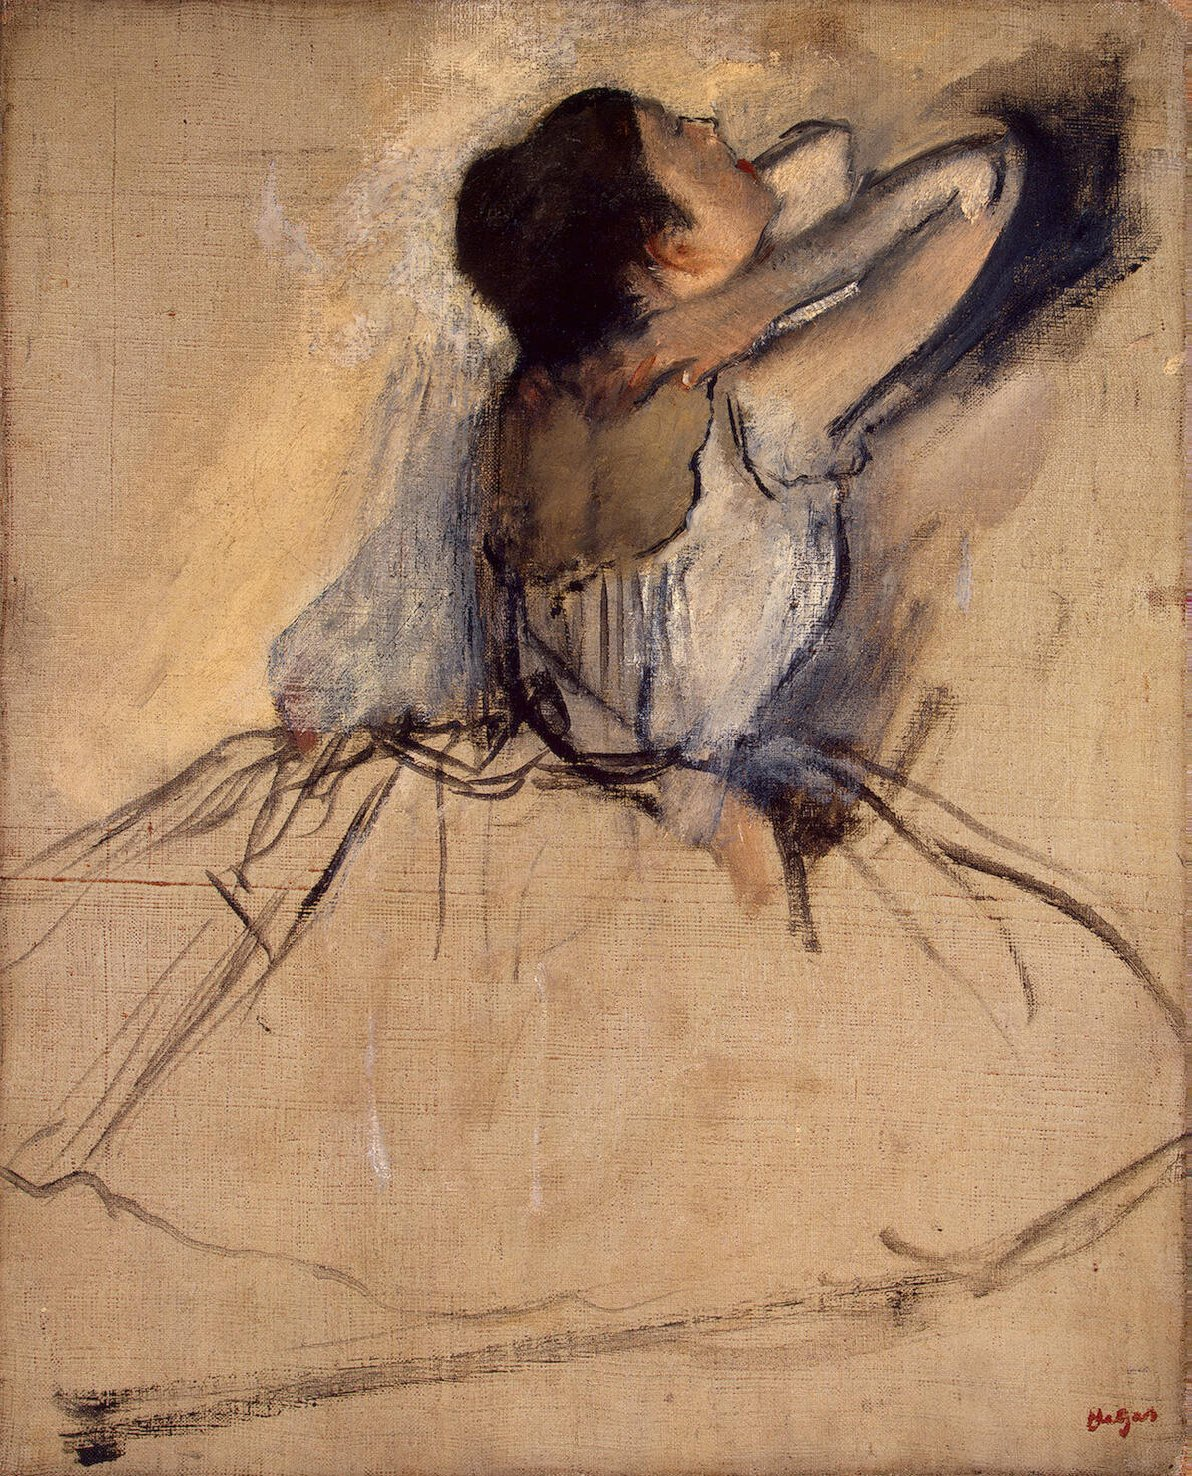

In [50]:
from PIL import Image

location= path / artist / 'paintings'
for filepath in filepaths:
  print (location / filepath )
  image = Image.open(location / filepath)
  break
image

## Creating embeddings with a pretrained ResNet

In [51]:
import torch
from torchvision import models
# creates a Resnet model architucture with randomly initialized weights
model = models.resnet34(weights = None )

# this creates a ResNet34 with pretrained weights
# this model has been trained to classify 1000 different labels of the imagenet dataet
weights = models.ResNet34_Weights.IMAGENET1K_V1
model = models.resnet34(weights=wegihts)

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [52]:
dir(wegihts)

['__class__',
 '__doc__',
 '__eq__',
 '__hash__',
 '__module__',
 'get_state_dict',
 'meta',
 'name',
 'transforms',
 'url',
 'value',
 'verify']

In [53]:
print(weights.meta)

{'min_size': (1, 1), 'categories': ['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'rock python', 'Indian cobra', 'green mamba', 'sea snak

In [64]:
# This turns off batch normalization and DropOut
model.eval()

# Transform the data so that it is on the same dimensions and range of values
# as the training set
weights
transformations = weights.transforms()
transformations

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

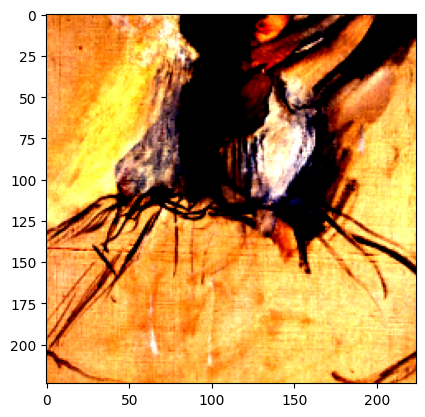

In [66]:
import torchvision.transforms.v2 as transforms

my_rewritten_transformation = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToImage(),
    transforms.ToDtype(torch.float32, scale=True),
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225))
])

plt.imshow(my_rewritten_transformation(image).permute(1, 2, 0));


In [ ]:
plt.imshow(t)

In [56]:
transformations(image).shape

torch.Size([3, 224, 224])

In [57]:
# view adds a batch dimension to the input

# logits is a fancy name for 'scores'
logits = model(transformations(image).view(1, 3, 224, 224))

logits.min(), logits.max()

(tensor(-7.7411, grad_fn=<MinBackward1>),
 tensor(8.9534, grad_fn=<MaxBackward1>))

In [58]:
max_score_label = torch.argmax(logits).item()
max_score_label

921

In [59]:
probs = torch.softmax(logits, dim=1)
probs.squeeze()[max_score_label]

tensor(0.2093, grad_fn=<SelectBackward0>)

In [60]:
import requests

# The raw URL to the JSON file
url = "https://raw.githubusercontent.com/aihpi/practical-computer-vision-with-pytorch/refs/heads/main/artifacts/imagenet_classes.json"

# Fetch the file
response = requests.get(url)

# Load the JSON content into a dictionary
label_mapping = eval(response.text)

label_mapping[str(max_score_label)], probs.squeeze()[max_score_label].item()

('book jacket, dust cover, dust jacket, dust wrapper', 0.2092778980731964)

In [61]:
model.eval()
with torch.inference_mode():
  probs, indices = torch.topk(probs.squeeze(), 5)
  for prob, index in zip(probs, indices):
    print (label_mapping[str(index.item())], f'{prob.item():.3f}')

book jacket, dust cover, dust jacket, dust wrapper 0.209
jellyfish 0.142
harvestman, daddy longlegs, Phalangium opilio 0.074
cockroach, roach 0.068
wolf spider, hunting spider 0.051


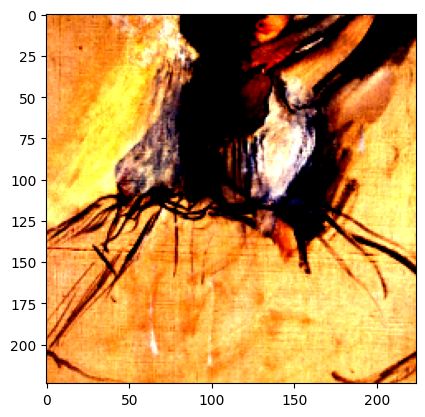

In [63]:
import matplotlib.pyplot as plt
# This changes the order of the channels
plt.imshow(transformations(image).permute(1, 2, 0));

## inspecting output of the convolutions

In [67]:
first_convolutions = list(model.children())[0]
first_convolutions

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [69]:
output_first_conv = first_convolutions(transformations(image).unsqueeze(0))
output_first_conv.shape

torch.Size([1, 64, 112, 112])

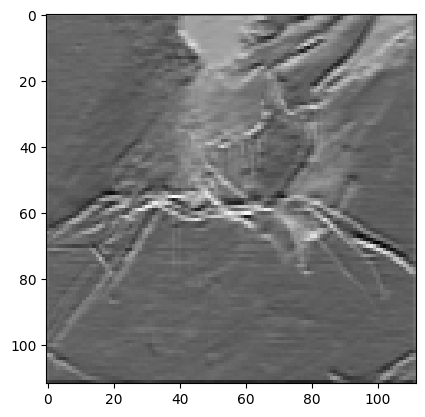

In [72]:
#
squeezed_and_detached_output = output_first_conv.squeeze().detach()
plt.imshow(squeezed_and_detached_output[0, ...], cmap='gray')

In [89]:
first_convolutions.weight.shape

torch.Size([64, 3, 7, 7])

In [91]:
import torch.nn as nn
output_max_pooling = nn.MaxPool2d(2)(output_first_conv)
output_max_pooling.shape

torch.Size([1, 64, 56, 56])

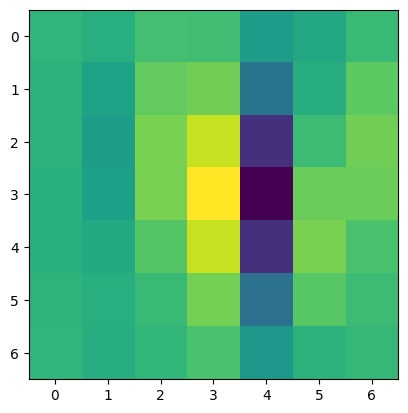

In [108]:
plt.imshow(first_convolutions.weight.detach()[1,1,
                                              ...])

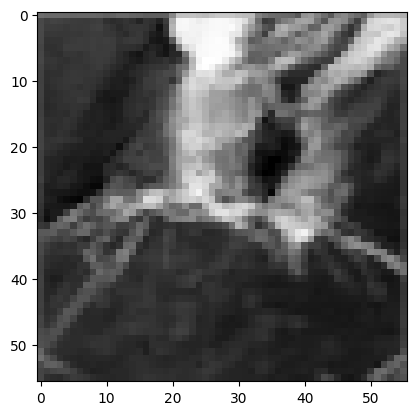

In [103]:
# @title Visualize output of convolutions {run:'auto'}
slider_value = 47  # @param {type: "slider", min: 0, max: 63}
plt.imshow(output_max_pooling.squeeze().detach()[slider_value, : , :], cmap='gray');

In [112]:
last_convolutions = nn.Sequential(*list(model.children())[:-3])
last_convolutions

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [114]:
output_last_conv = last_convolutions(transformations(image).unsqueeze(0))
output_last_conv.shape

torch.Size([1, 256, 14, 14])

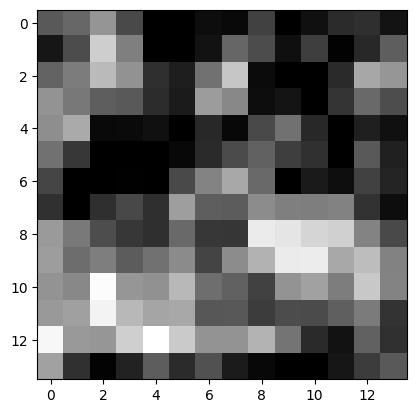

In [139]:
# @title Visualize output of convolutions {run:'auto'}
slider_value = 99  # @param {type: "slider", min: 0, max: 255}
plt.imshow(output_last_conv.squeeze().detach()[slider_value, : , :], cmap='gray');

## Getting the embedidngs

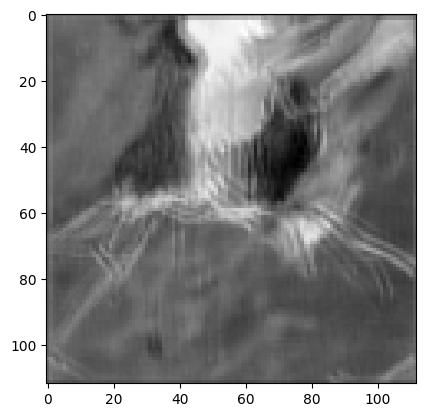

In [133]:
# @title Visualize output of convolutions {run:'auto'}
slider_value = 15  # @param {type: "slider", min: 0, max: 63}
plt.imshow(output_first_conv.squeeze().detach()[slider_value, : , :], cmap='gray');

## Getting the embeddings


In [142]:
embed_model = nn.Sequential(*list(model.children())[:-1])
embed_model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [147]:
# this turns off batch normalization
embed_model.eval()
with torch.inference_mode():
  embedding = embed_model(transformations(image).unsqueeze(0)).squeeze()
  embedding.shape

In [148]:
# keys are the full paths to the images, values are the embeddings
embeddings = {}

In [152]:
from PIL import Image
from tqdm import tqdm

artist = 'Edgar_degas'

filepaths = os.listdir(path / artist / 'paintings')

location = path / artist / 'paintings'
# check that we can see images in the location folder
for filepath in tqdm(filepaths):
  try:
    image = Image.open(location / filepath).convert('RGB')
    embeddings[location / filepath] = embed_model(my_rewritten_transformation(image).unsqueeze(0)).squeeze()
  except:
   continue




100%|██████████| 195/195 [00:49<00:00,  3.92it/s]


In [158]:
len(filepaths)

195

In [154]:
# check out the integrity of our pickle file
import pickle
with open(location / 'paintings_embeddings.pickle', 'wb') as handle:
    pickle.dump(embeddings, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(location / 'paintings_embeddings.pickle', 'rb') as handle:
    b = pickle.load(handle)

assert len(b.keys()) == len(embeddings.keys())


In [157]:
len(b)

195